<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #1 (demo)
## <center>  Exploratory data analysis with Pandas


**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset) + [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution).**

**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already  in the repository). Choose the answers in the [web-form](https://docs.google.com/forms/d/1uY7MpI2trKx6FLWZte0uVh3ULV4Cm_tDud0VDFGCOKg).**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings 
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../../data/adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [5]:
# You code here
data['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

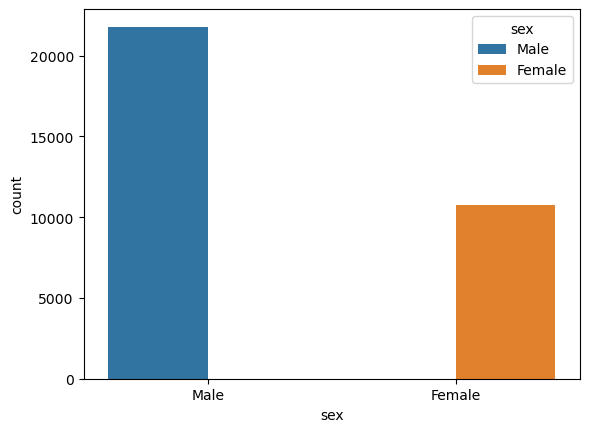

In [28]:
sns.countplot(x='sex',data=data,hue='sex')

**2. What is the average age (*age* feature) of women?**

In [6]:
# You code here
data[data['sex']=='Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [9]:
# You code here
# data['native-country'].value_counts(normalize=True)
(data['native-country']=='Germany').sum()/data.shape[0]


0.004207487485028101

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [10]:
# You code here
data.groupby(['salary'])['age'].agg([np.mean,np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [12]:
# You code here
# pd.crosstab(data['salary'],data['education'])
data[data['salary']=='>50K']["education"].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

<Axes: xlabel='education', ylabel='count'>

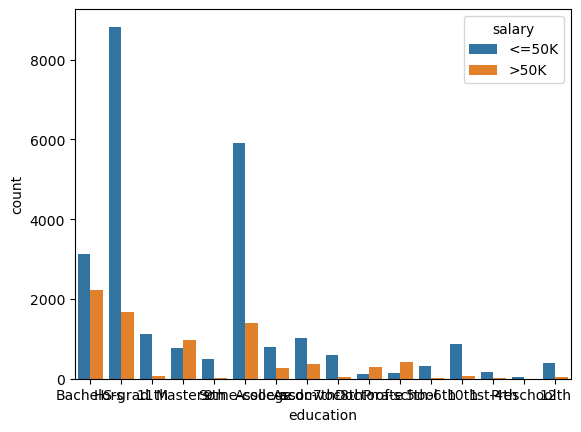

In [33]:
sns.countplot(x='education',hue='salary',data=data)

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [14]:
# You code here
data.groupby(['race','sex'])['age'].describe()

count       mean        std   min   25%   50%   
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0  \
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [20]:
# You code here
print('Married Men Stats')
data[(data['sex']=='Male') & (data['marital-status'].str.startswith('Married'))]['salary'].value_counts(normalize=True)

# pd.crosstab(data[data['sex']=='Male']['salary'],data[data['sex']=='Male']['marital-status'],normalize=True)

Married Men Stats


salary
<=50K    0.559486
>50K     0.440514
Name: proportion, dtype: float64

In [21]:
print('Unmarried Men Stats')
data[(data['sex']=='Male') & ~(data['marital-status'].str.startswith('Married'))]['salary'].value_counts(normalize=True)

Unmarried Men Stats


salary
<=50K    0.915505
>50K     0.084495
Name: proportion, dtype: float64

<Axes: xlabel='marital-status', ylabel='Count'>

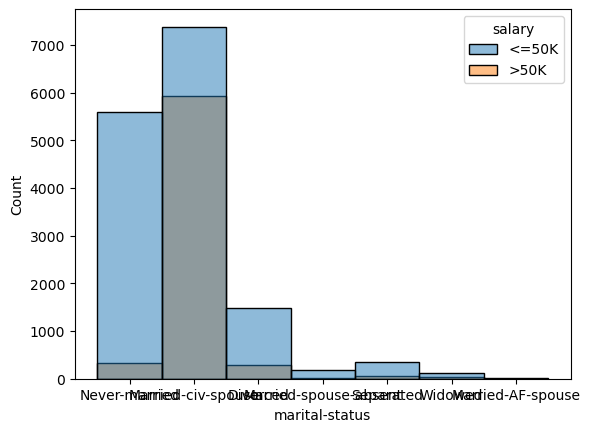

In [37]:
sns.histplot(x='marital-status',hue='salary',data=data[data['sex']=='Male'])
# sns.countplot(x='marital-status',hue='salary',data=data[data['sex']=='Male'])


**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [24]:
# You code here
max_hrs = data['hours-per-week'].max()
num_ppl = data[data['hours-per-week'] == max_hrs].shape[0]
print(f'Max work in dataset is {max_hrs} hours per week, worked by {num_ppl} people')

data[data['hours-per-week']==max_hrs]['salary'].value_counts(normalize=True)


Max work in dataset is 99 hours per week, worked by 85 people


salary
<=50K    0.705882
>50K     0.294118
Name: proportion, dtype: float64

<Axes: xlabel='salary', ylabel='Probability'>

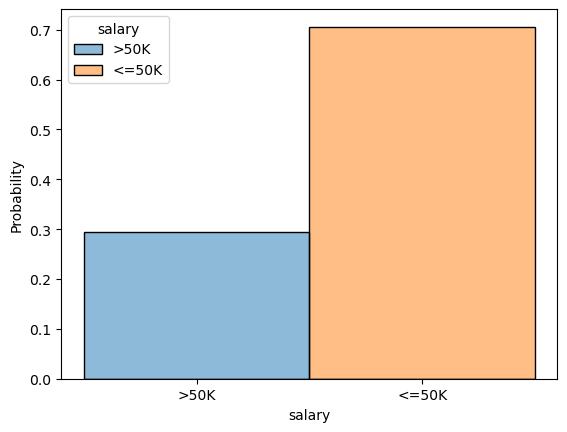

In [45]:
sns.histplot(x='salary',hue='salary',data=data[data['hours-per-week']==max_hrs],stat='probability')


**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [47]:
# You code here
pd.crosstab(data['native-country'],data['salary'],values=data['hours-per-week'],aggfunc=np.mean)

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


<Axes: xlabel='native-country'>

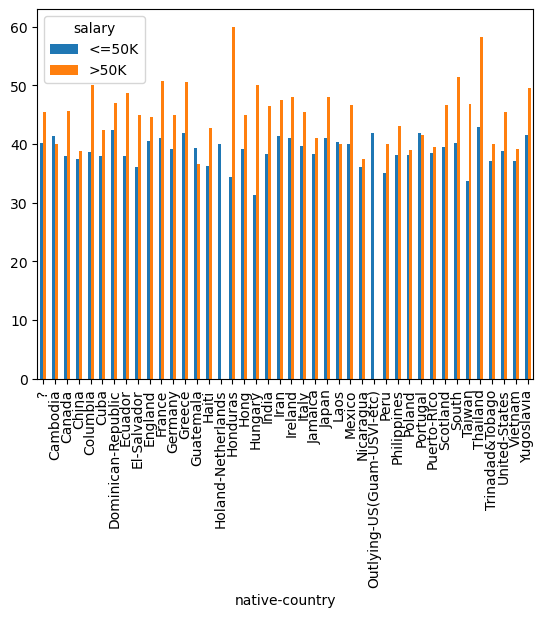

In [53]:
# sns.histplot(x='salary',hue='native-country',data=pd.crosstab(data['native-country'],data['salary'],values=data['hours-per-week'],aggfunc=np.mean),stat='probability')
pd.crosstab(data['native-country'],data['salary'],values=data['hours-per-week'],aggfunc=np.mean).plot(kind='bar')